In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [9]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [11]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses- heads
print("heads, tails: ", [heads, tails])

heads, tails:  [44, 56]


In [15]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([52., 48.])

In [16]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5100, 0.4900])

In [18]:
counts = Multinomial(10000, fair_probs).sample()
counts/10000

tensor([0.5022, 0.4978])

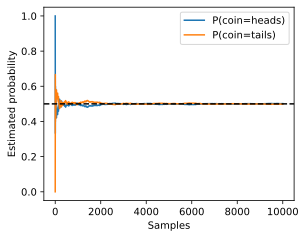

In [22]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()                                   

In [23]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'GeneralizedPareto', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'InverseGamma', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'T

#### Specific Functions and Classes

In [24]:
 help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.

    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.

    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the curre